# Business Understanding

Gemeente Zwolle wil integraal te werk gaan met de verschillende afdelingen die betrokken zijn met wegen die opengemaakt moeten worden voor onderhoud of aanpassingen. Voor ons is het de taak om dit met de afdelingen groen (bomen), grijs (wegen) en blauw (riool) te coördineren en op basis van de beschikbare data waarde te realiseren naar de gemeente. Als groep gaan wij bezig met het deel blauw waarin onze opdrachtgever graag een model wilt hebben die hem kan assisteren met besluiten maken over onderhoud van het riool, en of dit gecombineerd kan worden met wegonderhoud en of groenonderhoud. Aan ons de taak om op basis van de aangeleverde data een beslismodel te maken voor de stakeholder Gerrit die hem kan assisteren met het bepalen of een riool gereinigd, vervangen of gerepareerd moet worden. Waar mogelijk dienen wij dit te combineren met de andere afdelingen namelijk wegen en groen.  

Als tweede doel wilt Gemeente Zwolle een goede samenwerking tussen de verschillende afdelingen (groen, grijs en blauw) om efficienter te werken. Bijv. een weg open trekken wanneer zowel het riool eronder en de weg zeg aan onderhoud toe zijn. Om zo kort mogelijk een weg af te zetten en geld en tijd te besparen.

Gemeente zwolle hanteert 4 beoordelings aspecten (BDD, BAF, BCC, BAB). De beoodelingsaspecten bevatten een waarde van klasse 1 t/m 5. (klasse 1: geen actie nodig ... klasse 5: hoge nood). 
- BDD: waterdiepte
- BAF: maat van aantasting
- BCC: Kromming in riool
- BAB: Scheuren

## Data Understanding

In [1]:
from simpledbf import Dbf5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas

In [7]:
# Import data
dbf_levensduur = Dbf5('data/Riooldata/Levensduur.dbf')
dbf_riolering = Dbf5('data/Riooldata/Riolering.dbf')
dbf_schades = Dbf5('data/Riooldata/Schades.dbf')

dbf_putten = Dbf5(r'data/riolering april 2020/putten.dbf')
dbf_putten_toekomst = Dbf5(r'data/riolering april 2020/putten-toekomst.dbf')
dbf_strengen = Dbf5(r'data/riolering april 2020/Strengen.dbf')
dbf_strengen_toekomst = Dbf5(r'data/riolering april 2020/Strengen-toekomst.dbf')

In [8]:
# Convert data to dataframes
df_levensduur = dbf_levensduur.to_dataframe()
df_riolering = dbf_riolering.to_dataframe()
df_schades = dbf_schades.to_dataframe()

df_putten = dbf_putten.to_dataframe()
df_putten_toekomst = dbf_putten_toekomst.to_dataframe()
df_strengen = dbf_strengen.to_dataframe()
df_strengen_toekomst = dbf_strengen_toekomst.to_dataframe()

In [4]:
df_levensduur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12988 entries, 0 to 12987
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BEHEEROBJE  12988 non-null  object 
 1   BAB         27 non-null     object 
 2   BAF         4421 non-null   object 
 3   BBC         12438 non-null  object 
 4   BDD         12602 non-null  object 
 5   JAARAANLEG  12988 non-null  int64  
 6   RISICOPROF  12988 non-null  object 
 7   JAARINSPEC  12988 non-null  int64  
 8   STRAATNAAM  12988 non-null  object 
 9   KNOOPPUNT_  12988 non-null  object 
 10  KNOOPPUNT1  12988 non-null  object 
 11  BOB_BEGINK  12988 non-null  float64
 12  BOB_EINDKN  12988 non-null  float64
 13  BREEDTE_DI  12988 non-null  float64
 14  MATERIAAL   12981 non-null  object 
 15  LENGTE      12988 non-null  float64
 16  SHAPE_Leng  12988 non-null  float64
 17  HOOGTE      12988 non-null  float64
 18  VORM        12985 non-null  object 
 19  CATEGORIE   12988 non-nul

In [5]:
df_levensduur

,BEHEEROBJE,BAB,BAF,BBC,BDD,JAARAANLEG,RISICOPROF,JAARINSPEC,STRAATNAAM,KNOOPPUNT_,KNOOPPUNT1,BOB_BEGINK,BOB_EINDKN,BREEDTE_DI,MATERIAAL,LENGTE,SHAPE_Leng,HOOGTE,VORM,CATEGORIE
0,LEI-001-19514,NaN,3,1,4,2009,Hoog,2017,Botlek,20241,12833,-0.85,-0.90,600.0,Beton,14.62,14.616583,0.0,Rond,Gegarandeerd 3 jaar
1,LEI-001-19515,NaN,3,1,4,2009,Hoog,2017,Botlek,20241,12834,-0.85,-0.90,600.0,Beton,14.55,14.554577,0.0,Rond,Gegarandeerd 3 jaar
2,LEI-001-19223,NaN,NaN,1,4,2008,Hoog,2018,Wethouder Alferinkweg,20528,19475,-0.86,-0.86,1250.0,Beton,6.15,6.153251,0.0,Rond,Gegarandeerd 3 jaar
3,LEI-001-12083,NaN,NaN,1,4,2014,Laag,2020,Vestingstraat,19764,19884,0.06,0.11,250.0,Pvc,8.34,8.341013,0.0,Rond,Gegarandeerd 5 jaar
4,LEI-001-18143,NaN,NaN,1,4,2006,Laag,2018,Hofstedestraat,17558,17557,-2.99,-2.96,250.0,Pvc,29.60,29.599394,0.0,Rond,Gegarandeerd 5 jaar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12983,LEI-001-15561,NaN,NaN,1,3,1951,Hoog,2018,Bisschop Willebrandlaan,7437,7438,0.10,0.10,300.0,Beton,62.43,62.432041,0.0,Rond,                                              ...
12984,LEI-001-18968,NaN,NaN,NaN,NaN,2006,Hoog,2018,Hasselterweg,17287,17294,-0.85,-0.85,500.0,Beton,91.76,91.756008,0.0,Rond,                                              ...
12985,LEI-001-18216,NaN,NaN,1,1,1999,Hoog,2018,Milligerlaan,14407,14426,-2.32,-2.27,250.0,Beton,47.34,47.335442,0.0,Rond,                                              ...
12986,LEI-001-01434,NaN,NaN,1,1,1987,Hoog,2016,Lichterweg,5481,5482,-0.39,-0.40,500.0,Beton,36.62,36.621192,0.0,Rond,                                              ...


In [6]:
df_riolering

,OBJECTID,AMBITIENIV,BEGINDATUM,EINDDATUM,BEHEEROBJE,BOB_BEGINK,BOB_EINDKN,BREEDTE_DI,BUURT,EXTRA_INFO,...,TOESTAND_1,TOESTAND_2,VERBINDING,VRIJE_BREE,WANDRUWHEI,WEGFUNCTIE,WEGVERHARD,Shape_Leng,STRENGKOPP,STATUS
0,1,basis,1967-01-01,NaN,LEI-001-00054,-0.65,-0.72,400.0,NaN,131,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,31.888677,1,Initieel
1,2,basis,1935-01-02,NaN,LEI-001-00056,-0.14,-0.18,500.0,NaN,113,...,Waarschuwing,Geen bijzonderheden,NaN,22.0,0.0,NaN,NaN,40.956329,2,Initieel
2,3,basis,1935-01-02,NaN,LEI-001-00057,-0.08,-0.10,500.0,NaN,113,...,NaN,NaN,NaN,22.0,0.0,NaN,NaN,41.759197,3,Initieel
3,4,basis,1950-01-01,NaN,LEI-001-00058,-0.32,-0.33,300.0,NaN,121,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,13.757721,4,Initieel
4,5,basis,1901-01-01,NaN,LEI-001-00059,-0.21,-0.25,300.0,NaN,121,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,56.891287,5,Initieel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21161,21162,basis,2018-10-24,NaN,LEI-001-11762,-0.96,-0.96,1000.0,NaN,113,...,Geen bijzonderheden,Geen bijzonderheden,NaN,22.0,0.0,NaN,NaN,12.913319,0,Nieuw
21162,21163,basis,2020-06-01,NaN,LEI-001-11373,-3.22,-3.28,500.0,NaN,151,...,Geen bijzonderheden,Ingrijpen,NaN,0.0,0.0,NaN,NaN,7.433391,0,Nieuw
21163,21164,basis,2020-06-01,NaN,LEI-001-13156,-0.13,-0.13,300.0,NaN,141,...,Waarschuwing,Ingrijpen,NaN,0.0,0.0,NaN,NaN,44.990311,0,Nieuw
21164,21165,basis,2020-06-01,NaN,LEI-001-15345,-1.37,-1.42,400.0,NaN,141,...,Waarschuwing,Geen bijzonderheden,NaN,0.0,0.0,NaN,NaN,59.827312,0,Nieuw


In [7]:
# kolom AMBITIENIV bevat maar 1 waarde: 'basis'
pd.unique(df_riolering['AMBITIENIV'])

array(['basis'], dtype=object)

In [8]:
df_schades

,OBJECTID,VANNAAR,INSPDAT,TYPEINS,INSPECTEUR,OPM,BAB,BAF,BBC,BDD,FOTONAAM,FOTOLINK,BEHEEROBJE,REL_OBJECT
0,18557,12560-12561,2017-06-12,Voor reiniging,J. Borst,"bocht net na put,,",NaN,BAF3 - toeslagstoffen die uitsteken,BBC1 - h <= 5%,BDD1 - h <= 10%,12560-12561.jpg,NaN,LEI-001-00061,7
1,18561,12568-12562,2017-06-12,Voor reiniging,J. Borst,"voertuig op put,Geen Actie,",NaN,NaN,NaN,NaN,12568-12562.jpg,NaN,LEI-001-00063,9
2,18564,12549-12550,2017-06-14,Voor reiniging,J. Borst,"zak in leiding achter put,,",NaN,NaN,BBC1 - h <= 5%,BDD2 - 10% < h <= 25%,12549-12550.jpg,NaN,LEI-001-00065,11
3,18565,12550-12549,2017-06-14,Voor reiniging,J. Borst,"zak in leiding achter put,,",NaN,NaN,BBC1 - h <= 5%,BDD2 - 10% < h <= 25%,12550-12549.jpg,NaN,LEI-001-00065,11
4,18567,10582-10583,2017-09-15,Voor reiniging,Hugo,"wortels, complexe massa, 10-25%,Frezen,Gedetai...",NaN,BAF3 - toeslagstoffen die uitsteken,BBC1 - h <= 5%,BDD1 - h <= 10%,10582-10583-3.jpg,NaN,LEI-001-00008,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,40943,20445-20446,2020-04-06,Voor reiniging,J. Borst,put vol zand. leiding niet zichtbaar foto tele...,NaN,NaN,NaN,NaN,20445-20446.jpg,NaN,NaN,20605
5381,40944,20446-20445,2020-04-06,Voor reiniging,J. Borst,put vol zand. leiding niet zichtbaar foto tele...,NaN,NaN,NaN,NaN,20446-20445.jpg,NaN,NaN,20605
5382,40945,20446-20447,2020-04-06,Voor reiniging,J. Borst,put vol zand. leiding niet zichtbaar foto tele...,NaN,NaN,NaN,NaN,20446-20447.jpg,NaN,NaN,20606
5383,40947,20446-20448,2020-04-06,Voor reiniging,J. Borst,put vol zand. leiding niet zichtbaar foto tele...,NaN,NaN,NaN,NaN,20446-20448.jpg,NaN,NaN,20607


In [9]:
df_putten_toekomst

,OBJECTID,AMBITIENIV,BEGINDATUM,EINDDATUM,BEHEEROBJE,BINNENONDE,BREEDTE,CENTRALE_V,EXTRA_INFO,EXTRA_IN_1,...,PEILBUISLE,POMPSCHAKE,STROOMGEBI,STRUCTUURG,PERCEELSAA,KOLKAANSLU,BUURT,WOONPLAATS,STRAAT,STRAATCODE
0,1,basis,1981-01-01,NaN,KPT-001-10004,0.30,600.0,NaN,ja,20080619,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22,basis,NaN,NaN,KPT-001-19810,0.37,800.0,NaN,nee,20080522,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Stadsdeel West,NaN,NaN
2,25,basis,NaN,NaN,KPT-001-19860,-0.20,800.0,NaN,ja,20080527,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Stadsdeel West,NaN,NaN
3,30,basis,NaN,NaN,KPT-001-19865,-0.36,900.0,NaN,ja,20080527,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Stadsdeel West,NaN,NaN
4,34,basis,NaN,NaN,KPT-001-20193,0.00,800.0,NaN,ja,20081009,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Stadsdeel West,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,943,basis,2022-01-01,NaN,KPT-001-23737,-0.95,800.0,NaN,ja,20031119,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
968,950,basis,2022-01-01,NaN,KPT-001-23745,0.20,800.0,NaN,ja,20031119,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
969,958,basis,2022-01-01,NaN,KPT-001-23755,-0.60,1000.0,NaN,ja,20031119,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970,960,basis,2022-01-01,NaN,KPT-001-23757,-1.90,1000.0,NaN,ja,20081209,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df1 = geopandas.read_file(r'data/riolering april 2020/Strengen.shp')
df1['geometry']

0        LINESTRING (203359.910 504382.280, 203391.250 ...
1        LINESTRING (203687.040 502003.330, 203699.640 ...
2        LINESTRING (203648.070 501882.590, 203660.960 ...
3        LINESTRING (199987.790 504206.830, 199974.860 ...
4        LINESTRING (200141.920 504140.030, 200089.680 ...
                               ...                        
21192    LINESTRING (204526.420 504152.020, 204519.110 ...
21193    LINESTRING (204519.110 504183.710, 204555.480 ...
21194    LINESTRING (204494.120 504416.330, 204488.590 ...
21195    LINESTRING (204525.750 504264.720, 204520.780 ...
21196    LINESTRING (204525.750 504264.720, 204548.450 ...
Name: geometry, Length: 21197, dtype: geometry

# Data Preparation

In [11]:
# Merge de schading aan de riolering data
df_riolering_schades = df_riolering.merge(df_schades, how='left', left_on='OBJECTID', right_on='REL_OBJECT', suffixes=("_riool", "_schades"))

In [12]:
df_riolering_schades

,OBJECTID_riool,AMBITIENIV,BEGINDATUM,EINDDATUM,BEHEEROBJE_riool,BOB_BEGINK,BOB_EINDKN,BREEDTE_DI,BUURT,EXTRA_INFO,...,INSPECTEUR,OPM,BAB,BAF,BBC,BDD,FOTONAAM,FOTOLINK,BEHEEROBJE_schades,REL_OBJECT
0,1,basis,1967-01-01,NaN,LEI-001-00054,-0.65,-0.72,400.0,NaN,131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,basis,1935-01-02,NaN,LEI-001-00056,-0.14,-0.18,500.0,NaN,113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,basis,1935-01-02,NaN,LEI-001-00057,-0.08,-0.10,500.0,NaN,113,...,G.G. Assink,put niet zichtbaar- actie: Voorlopig niets doen,NaN,NaN,NaN,NaN,NaN,NaN,LEI-001-00057,3.0
3,4,basis,1950-01-01,NaN,LEI-001-00058,-0.32,-0.33,300.0,NaN,121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,basis,1901-01-01,NaN,LEI-001-00059,-0.21,-0.25,300.0,NaN,121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22721,21162,basis,2018-10-24,NaN,LEI-001-11762,-0.96,-0.96,1000.0,NaN,113,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22722,21163,basis,2020-06-01,NaN,LEI-001-11373,-3.22,-3.28,500.0,NaN,151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22723,21164,basis,2020-06-01,NaN,LEI-001-13156,-0.13,-0.13,300.0,NaN,141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22724,21165,basis,2020-06-01,NaN,LEI-001-15345,-1.37,-1.42,400.0,NaN,141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_riolering_schades_clean = df_riolering_schades[['OBJECTID_riool','BEGINDATUM', 'EINDDATUM','BEHEEROBJE_riool','BAB','BAF','BBC','BDD']].copy()
df_riolering_schades_clean

,OBJECTID_riool,BEGINDATUM,EINDDATUM,BEHEEROBJE_riool,BAB,BAF,BBC,BDD
0,1,1967-01-01,NaN,LEI-001-00054,NaN,NaN,NaN,NaN
1,2,1935-01-02,NaN,LEI-001-00056,NaN,NaN,NaN,NaN
2,3,1935-01-02,NaN,LEI-001-00057,NaN,NaN,NaN,NaN
3,4,1950-01-01,NaN,LEI-001-00058,NaN,NaN,NaN,NaN
4,5,1901-01-01,NaN,LEI-001-00059,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
22721,21162,2018-10-24,NaN,LEI-001-11762,NaN,NaN,NaN,NaN
22722,21163,2020-06-01,NaN,LEI-001-11373,NaN,NaN,NaN,NaN
22723,21164,2020-06-01,NaN,LEI-001-13156,NaN,NaN,NaN,NaN
22724,21165,2020-06-01,NaN,LEI-001-15345,NaN,NaN,NaN,NaN


# Modelling

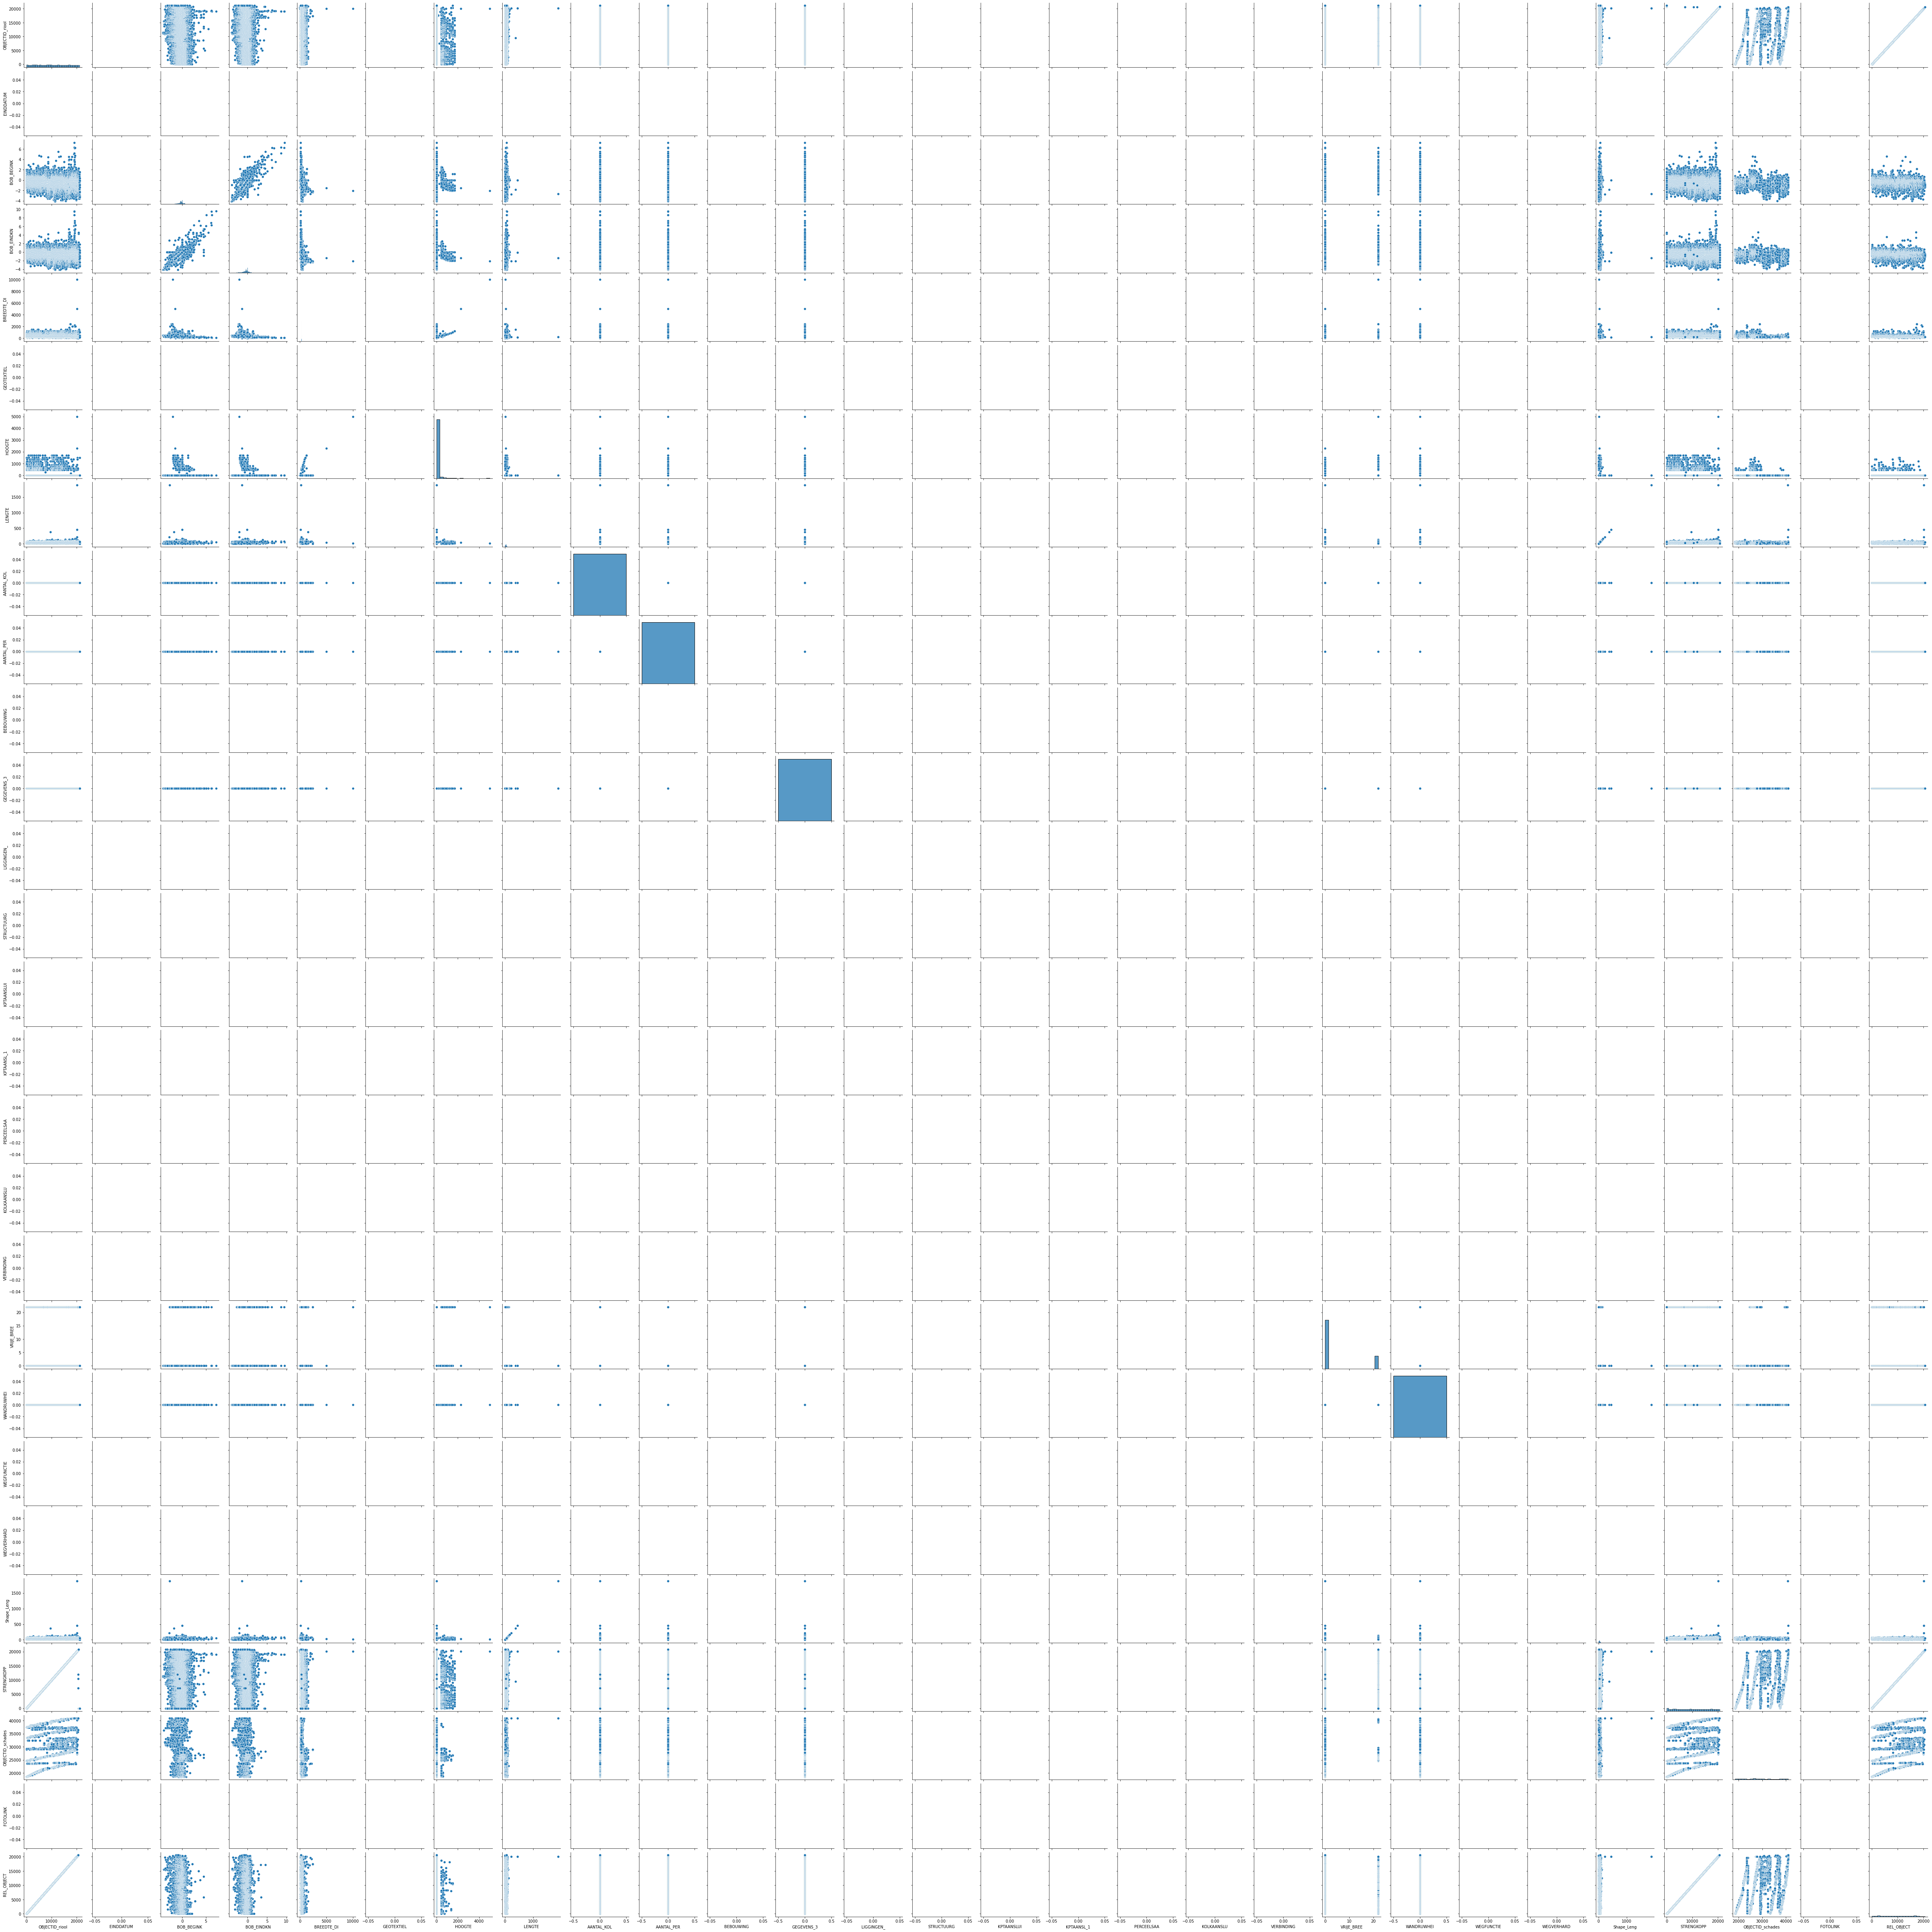

In [22]:
sns.pairplot(df_riolering_schades)